## This python notebook extracts a field from the CESM2-LE for regions of interest

In [1]:
import intake
import matplotlib.pyplot as plt
import xarray as xr
from distributed import Client
from ncar_jobqueue import NCARCluster
import dask
import numpy as np
from dask_jobqueue import PBSCluster

### Get some DASK going to speed up processing

In [2]:
# Setup your PBSCluster
cluster = PBSCluster(
    cores=2, # The number of cores you want
    memory='25 GB', # Amount of memory
    processes=1, # How many processes
    queue='casper', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='$TMPDIR', # Use your local directory
    resource_spec='select=1:ncpus=2:mem=25GB', # Specify resources
    project='NCGD0011', # Input your project ID here
    walltime='04:00:00', # Amount of wall time
    interface='ext', # Interface to use
)
# Scale up
cluster.scale(12)

# Change your url to the dask dashboard so you can see it
dask.config.set({'distributed.dashboard.link':'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'})

# Setup your client
client = Client(cluster)

In [3]:
client

Client Scheduler: tcp://128.117.208.108:44915 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/kristenk/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [4]:
catalog = intake.open_esm_datastore(
    '/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cesm2-le.json'
)

/glade/work/kristenk/miniconda/envs/analysis5/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (5,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
catalog.df.experiment.unique()

array(['historical', 'ssp370'], dtype=object)

In [6]:
#cat.search(component='ocn').df.variable.unique()
catalog.search(component='ocn',variable=['co3_sat_arag','CO3']).df

,component,stream,case,member_id,variable,start_time,end_time,time_range,long_name,units,vertical_levels,frequency,path,experiment,forcing_variant,cesm_member_id,control_branch_year,cmip_experiment_id
0,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,CO3,1850-01,1859-12,185001-185912,Carbonate Ion Concentration,mmol/m^3,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
1,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,CO3,1860-01,1869-12,186001-186912,Carbonate Ion Concentration,mmol/m^3,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
2,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,CO3,1870-01,1879-12,187001-187912,Carbonate Ion Concentration,mmol/m^3,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
3,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,CO3,1880-01,1889-12,188001-188912,Carbonate Ion Concentration,mmol/m^3,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
4,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,CO3,1890-01,1899-12,189001-189912,Carbonate Ion Concentration,mmol/m^3,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,co3_sat_arag,2055-01,2064-12,205501-206412,CO3 concentration at aragonite saturation,mmol/m^3,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2
5196,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,co3_sat_arag,2065-01,2074-12,206501-207412,CO3 concentration at aragonite saturation,mmol/m^3,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2
5197,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,co3_sat_arag,2075-01,2084-12,207501-208412,CO3 concentration at aragonite saturation,mmol/m^3,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2
5198,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,co3_sat_arag,2085-01,2094-12,208501-209412,CO3 concentration at aragonite saturation,mmol/m^3,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2


In [7]:
var = ['co3_sat_arag','CO3']

#### future scenario part

In [8]:
subset = catalog.search(component='ocn',
                        variable=var,
                        experiment='ssp370', #'ssp370',
                        forcing_variant='cmip6',
                       )

In [9]:
def preprocess(ds):
    ds=ds.isel(z_t=0)
    #ds=ds.isel(z_t_150m=0)
    return ds

In [10]:
with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    dsets = subset.to_dataset_dict(preprocess=preprocess)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream.forcing_variant.variable'


In [11]:
add_it_up = 0
for ds in dsets.keys():
    print(ds, len(dsets[ds].member_id))
    add_it_up = add_it_up + len(dsets[ds].member_id)
    
print('total members = ', add_it_up)

ocn.ssp370.pop.h.cmip6.co3_sat_arag 50
ocn.ssp370.pop.h.cmip6.CO3 50
total members =  100


In [12]:
my_key = 'ocn.ssp370.pop.h.cmip6.' + var[0]
ds_tmp = dsets[my_key]
#fix time dimension so it's a mean of the timebounds
ds_tmp['time']= ds_tmp.time_bound.compute().mean(dim="d2")

In [13]:
my_key = 'ocn.ssp370.pop.h.cmip6.' + var[1]
ds_tmp2 = dsets[my_key]
#fix time dimension so it's a mean of the timebounds
ds_tmp2['time']= ds_tmp2.time_bound.compute().mean(dim="d2")

In [14]:
ds_ssp = xr.merge([ds_tmp, ds_tmp2])

In [15]:
keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + var

ds_ssp = ds_ssp.drop([v for v in ds_ssp.variables if v not in keep_vars])

In [16]:
#ds_ssp = ds_ssp.mean(dim='member_id')

In [17]:
ds_ssp['omega_arag'] = ds_ssp.CO3/ds_ssp.co3_sat_arag

### get coordinate data for the CESM ocean grid

In [18]:
import pop_tools
import utils

ds_grid = pop_tools.get_grid('POP_gx1v7')

lons = ds_grid.TLONG
lats = ds_grid.TLAT
area = ds_grid.TAREA
lons_norm = utils.normal_lons(lons)

In [19]:
ds1 = ds_ssp.isel(time=slice(0,60)).mean(dim=('time','member_id'))

In [20]:
ds2 = ds_ssp.isel(time=slice(972,1032)).mean(dim=('time','member_id'))

In [21]:
ds1

<xarray.Dataset>
Dimensions:       (nlat: 384, nlon: 320, z_t_150m: 15)
Coordinates:
    z_t           float32 500.0
  * z_t_150m      (z_t_150m) float32 500.0 1.5e+03 2.5e+03 ... 1.35e+04 1.45e+04
    TLONG         (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT          (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    dz            float32 dask.array<chunksize=(), meta=np.ndarray>
    co3_sat_arag  (nlat, nlon) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    CO3           (nlat, nlon) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    omega_arag    (nlat, nlon) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>

In [22]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [23]:
ds1['omega_arag'] = ds1.CO3/ds1.co3_sat_arag

In [24]:
ds2['omega_arag'] = ds2.CO3/ds2.co3_sat_arag

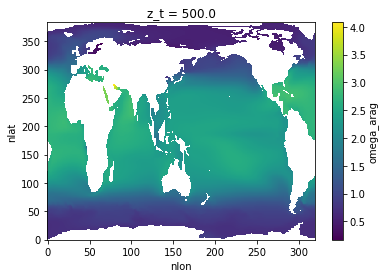

In [25]:
ds2.omega_arag.plot()

In [26]:
import warnings
warnings.filterwarnings('ignore')

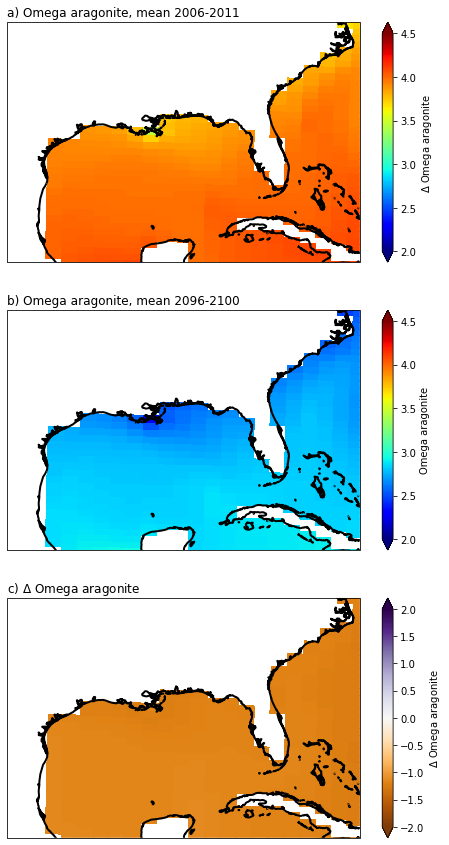

In [27]:
fig = plt.figure(figsize=(8,15))

################################################################################ 
ax = fig.add_subplot(3,1,1,projection=ccrs.PlateCarree())
ax.set_title('a) Omega aragonite, mean 2006-2011', loc='left')
ax.set_extent([-100, -75, 20, 37], ccrs.PlateCarree())

lon, lat, field = utils.adjust_pop_grid(lons,lats,(ds1.omega_arag))
pc = ax.pcolormesh(lon, lat, field, cmap='jet',vmin=2, vmax=4.5,transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=2)
fig.colorbar(pc,  extend='both', label='${\Delta}$ Omega aragonite');


################################################################################ 
ax = fig.add_subplot(3,1,2,projection=ccrs.PlateCarree())
ax.set_title('b) Omega aragonite, mean 2096-2100', loc='left')
ax.set_extent([-100, -75, 20, 37], ccrs.PlateCarree())

lon, lat, field = utils.adjust_pop_grid(lons,lats,(ds2.omega_arag))
pc = ax.pcolormesh(lon, lat, field, cmap='jet',vmin=2, vmax=4.5,transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=2)
fig.colorbar(pc,  extend='both', label='Omega aragonite');


################################################################################ 
ax = fig.add_subplot(3,1,3,projection=ccrs.PlateCarree())
ax.set_title('c) ${\Delta}$ Omega aragonite', loc='left')
ax.set_extent([-100, -75, 20, 37], ccrs.PlateCarree())

lon, lat, field = utils.adjust_pop_grid(lons,lats,(ds2.omega_arag - ds1.omega_arag))
pc = ax.pcolormesh(lon, lat, field, cmap='PuOr',vmin=-2, vmax=2,transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=2)
fig.colorbar(pc,  extend='both', label='${\Delta}$ Omega aragonite');

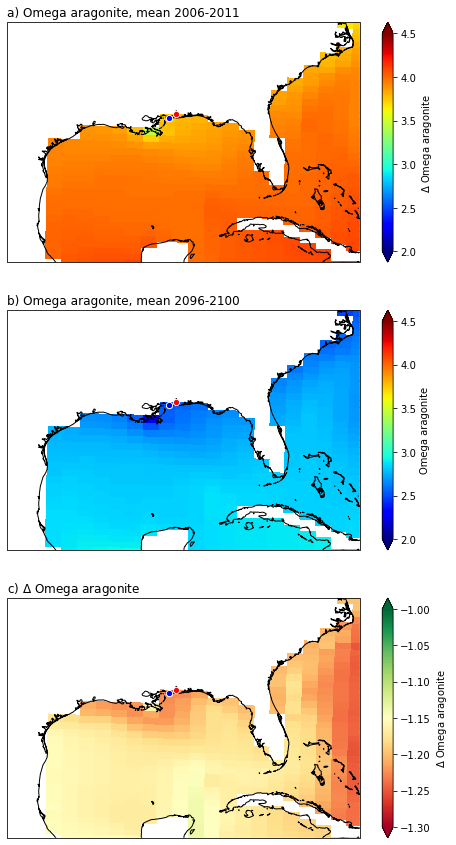

In [28]:
fig = plt.figure(figsize=(8,15))

################################################################################ 
ax = fig.add_subplot(3,1,1,projection=ccrs.PlateCarree())
ax.set_title('a) Omega aragonite, mean 2006-2011', loc='left')
ax.set_extent([-100, -75, 20, 37], ccrs.PlateCarree())

lon, lat, field = utils.adjust_pop_grid(lons,lats,(ds1.omega_arag))
pc = ax.pcolormesh(lon, lat, field, cmap='jet',vmin=2, vmax=4.5,
                   transform=ccrs.PlateCarree(),zorder=0)
ax.coastlines('10m',linewidth=1,zorder=1)
fig.colorbar(pc,  extend='both', label='${\Delta}$ Omega aragonite');

ax.scatter(-88,30.5,s=40,color='red',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mobile Bay')
ax.scatter(-88.5,30.25,s=40,color='blue',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mississippi Sound')
################################################################################ 
ax = fig.add_subplot(3,1,2,projection=ccrs.PlateCarree())
ax.set_title('b) Omega aragonite, mean 2096-2100', loc='left')
ax.set_extent([-100, -75, 20, 37], ccrs.PlateCarree())

lon, lat, field = utils.adjust_pop_grid(lons,lats,(ds2.omega_arag))
pc = ax.pcolormesh(lon, lat, field, cmap='jet',vmin=2, vmax=4.5,
                   transform=ccrs.PlateCarree(),zorder=0)
ax.coastlines('10m',linewidth=1,zorder=1)
fig.colorbar(pc,  extend='both', label='Omega aragonite');

ax.scatter(-88,30.5,s=40,color='red',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mobile Bay')
ax.scatter(-88.5,30.25,s=40,color='blue',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mississippi Sound')
################################################################################ 
ax = fig.add_subplot(3,1,3,projection=ccrs.PlateCarree())
ax.set_title('c) ${\Delta}$ Omega aragonite', loc='left')
ax.set_extent([-100, -75, 20, 37], ccrs.PlateCarree())

lon, lat, field = utils.adjust_pop_grid(lons,lats,(ds2.omega_arag - ds1.omega_arag))
pc = ax.pcolormesh(lon, lat, field, cmap='RdYlGn',vmin=-1.3, vmax=-1,
                   transform=ccrs.PlateCarree(),zorder=0)
ax.coastlines('10m',linewidth=1,zorder=1)

ax.scatter(-88,30.5,s=40,color='red',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mobile Bay')
ax.scatter(-88.5,30.25,s=40,color='blue',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mississippi Sound')



fig.colorbar(pc,  extend='both', label='${\Delta}$ Omega aragonite');

#### Make ds2 30 years into the future (mean 2035 to 249), rather than at the end of the century

In [29]:
ds2 = ds_ssp.isel(time=slice(360,420)).mean(dim=('time','member_id'))
ds2['omega_arag'] = ds2.CO3/ds2.co3_sat_arag

### Make a timeseries of changes around Mississippi Sound and Mobile Bay

In [30]:
box1_latmin = 30
box1_latmax = 31
box1_lonmin = -89
box1_lonmax = -87

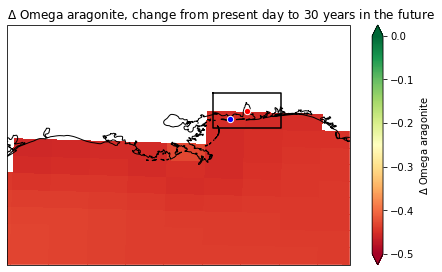

In [31]:
fig = plt.figure(figsize=(8,15))


################################################################################ 
ax = fig.add_subplot(3,1,3,projection=ccrs.PlateCarree())
ax.set_title('${\Delta}$ Omega aragonite, change from present day to 30 years in the future', loc='left')
ax.set_extent([-95, -85, 26, 33], ccrs.PlateCarree())

lon, lat, field = utils.adjust_pop_grid(lons,lats,(ds2.omega_arag - ds1.omega_arag))
pc = ax.pcolormesh(lon, lat, field, cmap='RdYlGn',vmin=-0.5, vmax=0,
                   transform=ccrs.PlateCarree(),zorder=0)
ax.coastlines('10m',linewidth=1,zorder=1)

ax.scatter(-88,30.5,s=40,color='red',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mobile Bay')
ax.scatter(-88.5,30.25,s=40,color='blue',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mississippi Sound')

lon_pts = [box1_lonmin,box1_lonmax,box1_lonmax,box1_lonmin,box1_lonmin]
lat_pts = [box1_latmax,box1_latmax,box1_latmin,box1_latmin,box1_latmax]
ax.plot(lon_pts, lat_pts, color="black", linewidth=1.5,transform=ccrs.PlateCarree())

fig.colorbar(pc,  extend='both', label='${\Delta}$ Omega aragonite');

### Now make timeseries in that box

In [32]:
ones = np.full((384,320),1,dtype=int)
ones = xr.DataArray(ones,dims=('nlat','nlon'))
ones = ones.where(ds_grid.REGION_MASK>0)

In [33]:
mask = ones.where(lats<box1_latmax).where(lats>box1_latmin).where(lons_norm<box1_lonmax).where(lons_norm>box1_lonmin)
mask = mask.where(ds_grid.REGION_MASK > 0)

In [34]:
ds_ssp = ds_ssp.drop(['z_t'])

In [35]:
def subset_box(da):
    
    masked_var = da.where(mask == 1)
    masked_area = area.where(mask == 1)
    
    da = (masked_var * masked_area).sum(dim=('nlon','nlat')) / (masked_area.sum(dim=('nlon','nlat')))

    da = da.compute()
    
    return da

In [36]:
%%time

da_var = subset_box(ds_ssp.omega_arag)

KeyboardInterrupt: 

In [37]:
da_ann = da_var.resample({'time':'A'}).mean(dim='time').compute()

NameError: name 'da_var' is not defined

In [ ]:
da_ann['time'] = np.arange(2015,2101,1)

In [ ]:
%%time

fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(1,1,1)
ax.set_title('SSP370 Omega aragonite at Mississippi Sound/Mobile Bay region')

da_ensmean = da_ann.mean(dim='member_id')

for mem in np.arange(0,50,1):
    #print(mem)
    ax.plot(da_ann.time, da_ann.isel(member_id=mem),linewidth=1)
    
ax.plot(da_ann.time, da_ensmean,linewidth=2, color='black')

ax.axvline(2017.5,color='lightgray',linewidth=35,zorder=0)
ax.axvline(2047.5,color='lightgray',linewidth=35,zorder=0)
ax.set(ylabel='Omega aragonite', xlabel='Year');

In [ ]:
#cluster.close()